Text(0.5, 0.5, 't')

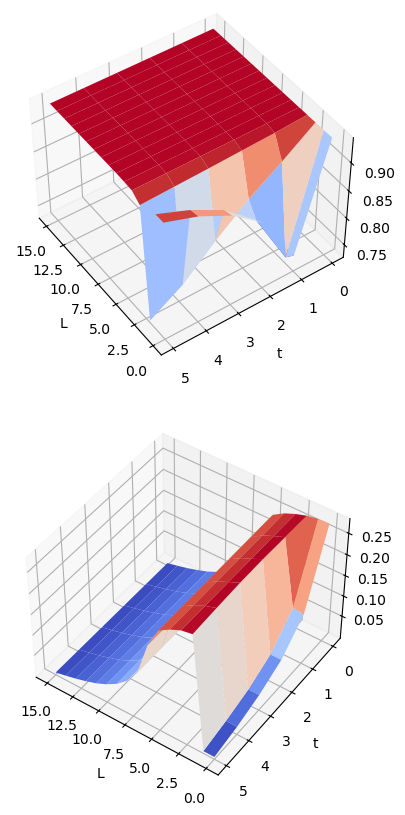

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator as RGI
from scipy.interpolate import LinearNDInterpolator as LNDI
from scipy.interpolate import RectBivariateSpline as RBS
from scipy.optimize import fsolve

#####################

nf = 100
nL = 16
nt = 6

fgrid = np.linspace(0,1,nf)            # table coordinates
Lgrid = np.arange(nL, dtype=np.float64)
tgrid = np.arange(nt, dtype=np.float64)

c = np.zeros((nf, nL, nt))
h = np.zeros((nf, nL, nt))
T = np.zeros((nf, nL, nt))

###################################

for iL in range(nL):
    for it in range(nt):
        fname = "flm_" + str(iL).zfill(2) + '_' + str(it).zfill(2) + ".dat"
        data = np.loadtxt(fname)

        ii = interp1d(data[:,1], data[:,4])       # mixf, c
        c[:,iL, it] = ii(fgrid)

        ii = interp1d(data[:,1], data[:,3])       # mixf, h
        h[:,iL, it] = ii(fgrid)

        ii = interp1d(data[:,1], data[:,2])       # mixf, T
        T[:,iL, it] = ii(fgrid)

#####################

hmax = np.max(h)
hmin = np.min(h)
h = (h-hmin)/(hmax-hmin)

#####################

cI = RGI((fgrid, Lgrid, tgrid), c, bounds_error=False, fill_value=None, method='linear')      # call as cI([fvalue, Lvalue, tvalue])
hI = RGI((fgrid, Lgrid, tgrid), h, bounds_error=False, fill_value=None, method='linear')      
TI = RGI((fgrid, Lgrid, tgrid), T, bounds_error=False, fill_value=None, method='linear')

#####################

LL,tt = np.meshgrid(Lgrid, tgrid)

imixf = 6

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1, projection='3d')
ax1.plot_surface(LL, tt, h[imixf,:,:].T, cmap=cm.coolwarm)
ax1.view_init(45,145)
ax1.set_xlabel('L')
ax1.set_ylabel('t')

ax2 = fig.add_subplot(2,1,2, projection='3d')
ax2.plot_surface(LL, tt, c[imixf,:,:].T, cmap=cm.coolwarm)
ax2.view_init(45,125)
ax2.set_xlabel('L')
ax2.set_ylabel('t')

#####################

